# Prueba Jr Data Analyst TalentPitch

## 3. Algoritmo de machine Learning para el clustering de los tipos de empleo por titulo

##### Este algoritmo se utilizara con los titulos de los cargos encontrados en el web scrapping en paralelo pero se puede aplicar tanto para las descripciones como las palabras claves. No obstante, por temas de optimización de tiempo solo lo utilizaremos con el nombre de los cargos

In [2]:
# Importamos todas las librerias necesarias para hacer una clasificación con lenguaje natural 
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
from nltk.cluster import KMeansClusterer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\analistaBi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\analistaBi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\analistaBi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\analistaBi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
# Importamos la data del webscraping en paralalelo que obtuvimos
df = pd.read_csv('EmpleosTitulosyDescripcion.csv')

In [4]:
# Elegimos la columna que queremos utilizar para categorizar
df.columns

Index(['Titulos', 'contenidos', 'Palabras claves'], dtype='object')

In [5]:

# Inicializamos un lemmatizer, nos desacemos de todas las palabras parecidas o iguales que pueden paracerse
# a la palabra especifica 
lemmatizer = WordNetLemmatizer()
texto =[]
tokens=[]

# Define the text
for i in df['Titulos']:
    texto.append(i)

# Tokenize the text
for i in texto:
    tokens.append(word_tokenize(i))
    #tokens = word_tokenize(texto)

# Remove the stop words
tokens1=[]
stop_words = set(stopwords.words("spanish"))
for token in tokens:
    tokens1.append( [w for w in token if w.lower() not in stop_words])


# Perform lemmatization on the tokens
lemmatized_tokens=[]
for tokens in tokens1:
    lemmatized_tokens.append([lemmatizer.lemmatize(token) for token in tokens])


In [6]:
# Añadimos los datos Lematizados en el dataset
df['LemmatizerTitulos'] = lemmatized_tokens
df=df.applymap(str)

df['LemmatizerTitulos']=df['LemmatizerTitulos'].str.replace('[','')
df['LemmatizerTitulos']=df['LemmatizerTitulos'].str.replace(']','')
df['LemmatizerTitulos']=df['LemmatizerTitulos'].str.replace(',',' ')
df['LemmatizerTitulos']=df['LemmatizerTitulos'].str.replace("'",' ')

<ipython-input-6-999bb8cd99cb>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['LemmatizerTitulos']=df['LemmatizerTitulos'].str.replace('[','')
<ipython-input-6-999bb8cd99cb>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['LemmatizerTitulos']=df['LemmatizerTitulos'].str.replace(']','')


In [7]:
df.shape

(9988, 4)

In [8]:
df.head()

,Titulos,contenidos,Palabras claves,LemmatizerTitulos
0,Analista de planeación de producción - sec...,Reconocido laboratorio ubicado al Norte de la ...,planeación ...,Analista planeación producción - ...
1,Auxiliar mecánico,"Importante multinacional del sector eléctrico,...",mecanico ...,Auxiliar mecánico
2,Enfermero jefe -,Para los diferentes servivios de Institución d...,Enfermero Jefe...,Enfermero jefe -
3,Auxiliar administrativo contable,Nos encontramos de manera urgente Analista de ...,auxiliar conta...,Auxiliar administrativo contable
4,Analista de datos,"Importante empresa de Infraestructura vial, re...",analista ...,Analista datos


In [9]:

# Instanciamos un vectorizador
vectorizer = TfidfVectorizer()
DescripcionCargo=df['LemmatizerTitulos'].values.astype("U")

# vectorizamos el texto de forma que podamos medir la diferencia que existe entre texto
X = vectorizer.fit_transform(DescripcionCargo)

# Intanciamos la agrupacion y el numero de clusters, podemos cambiar parametros inicales del clustering 
# como por ejemplo cambiado el tipo de distancia, sin normalizar los vectores o cambiar el numero de clusters
num_clusters = 20
clusterer = KMeansClusterer(num_clusters, distance=nltk.cluster.util.cosine_distance, repeats=30, normalise=True,avoid_empty_clusters=True)

# Creamos los agrupacion para cada una de las filas
clusters = clusterer.cluster(X.toarray(), assign_clusters=True)




In [10]:
feature_names = vectorizer.get_feature_names()

# Creamos un diccionario para insertar las características de cada cluster
cluster_features = {i:[] for i in range(num_clusters)}

# Iterar sobre los vectores y agregar los nombres de características al cluster apropiado
for i, vector in enumerate(X):
    cluster = clusters[i]
    for j, value in enumerate(vector.toarray()[0]):
        if value != 0:
            feature = feature_names[j]
            cluster_features[cluster].append(feature)

C:\Users\analistaBi\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Ver las 30 primeras palabras con mayor coincidencia por cluster

In [81]:
print(cluster_features[18][0:30])

['docente', 'física', 'science', 'acompañamiento', 'apoyo', 'docente', 'prácticas', 'campus', 'completo', 'derecho', 'maestria', 'popayan', 'profesor', 'publico', 'tiempo', 'bilingüe', 'docente', 'ict', 'docente', 'ingles', 'centro', 'docente', 'emprendimiento', 'medio', 'pensamiento', 'tiempo', 'docente', 'física', 'science', 'docente']


### Insertamos la columna de Cluster en el dataset

In [14]:
df.insert(loc=4,column = 'Cluster', value = clusters)

### Como ejemplo de como el algoritmo categoriza el lenguaje natural, escogemos las primeras 20 lineas del cluster 18 que relaciona los cargos docente


In [80]:
df[df['Cluster'] == 18].head(20)

,Titulos,contenidos,Palabras claves,LemmatizerTitulos,Cluster
119,Docente física/science,Los colegios de la red Cognita siempre se comp...,enseñanza ...,Docente física/science,18
204,Docente de apoyo y acompañamiento a prácti...,La Fundación Universitaria Agraria de Colombia...,Profesional en...,Docente apoyo acompañamiento prácticas,18
236,Profesor (a) tiempo completo derecho maest...,En la Universidad Cooperativa de Colombia esta...,docente ...,Profesor ( ) tiempo completo d...,18
284,Docente de ict bilingüe,Los colegios de la red Cognita siempre se comp...,colegio ...,Docente ict bilingüe,18
288,Docente de ingles,Docentes ingles primaria Colegio Fontibón,docente ...,Docente ingles,18
316,Docente medio tiempo-centro de pensamient...,La Fundación Universitaria Agraria de Colombia...,docente ...,Docente medio tiempo-centro pensamie...,18
413,Docente física/science,Los colegios de la red Cognita siempre se comp...,enseñanza ...,Docente física/science,18
519,Docente física/science,Los colegios de la red Cognita siempre se comp...,enseñanza ...,Docente física/science,18
533,Docente de ict bilingüe,Los colegios de la red Cognita siempre se comp...,colegio ...,Docente ict bilingüe,18
538,Docente de ingles,Docentes ingles primaria Colegio Fontibón,docente ...,Docente ingles,18


## Insertar la Columna de descripción de Cluster

In [82]:
import numpy as np
df['Definicion Cluster']= np.where(df['Cluster'] == 0, 'Auxiliares y Aprendices', 
                          np.where(df['Cluster'] == 1, 'Operadores, planeadores, lideres de Mantenimiento',
                          np.where(df['Cluster'] == 2, 'Otros',
                          np.where(df['Cluster'] == 3, 'Administradores y Asesores',
                          np.where(df['Cluster'] == 4, 'Analistas de diferentes areas',
                          np.where(df['Cluster'] == 5, 'Cargos comerciales, mercadeo',
                          np.where(df['Cluster'] == 6, 'Supervisores, Encargados, Coordinadores',
                          np.where(df['Cluster'] == 7, 'Directores',
                          np.where(df['Cluster'] == 8, 'Auditores, Desarrolladores y Consultores',
                          np.where(df['Cluster'] == 9, 'Sector de compras',
                          np.where(df['Cluster'] == 10, 'Servicios',
                          np.where(df['Cluster'] == 11, 'Tecnicos',
                          np.where(df['Cluster'] == 12, 'Cargos de Soporte',
                          np.where(df['Cluster'] == 13, 'Asesores en diferentes areas',
                          np.where(df['Cluster'] == 14, 'Cargos de Project manager, manager, comunicaciones y Digital trafficker',
                          np.where(df['Cluster'] == 15, 'Areas de datos, base de datos y especialistas en diferentes areas',
                          np.where(df['Cluster'] == 16, 'Cargos Administrativos',
                          np.where(df['Cluster'] == 17, 'Puntos de ventas, recaudos o cargos menores',
                          np.where(df['Cluster'] == 18, 'Docentes, profesores y formadores',
                          np.where(df['Cluster'] == 19, 'Ejecutivos, Gerentes y cargos bilingues b2/c1', 'Otros'))))))))))))))))))))

In [83]:
df.head()

,Titulos,contenidos,Palabras claves,LemmatizerTitulos,Cluster,Definicion Cluster
0,Analista de planeación de producción - sec...,Reconocido laboratorio ubicado al Norte de la ...,planeación ...,Analista planeación producción - ...,4,Analistas de diferentes areas
1,Auxiliar mecánico,"Importante multinacional del sector eléctrico,...",mecanico ...,Auxiliar mecánico,0,Auxiliares y Aprendices
2,Enfermero jefe -,Para los diferentes servivios de Institución d...,Enfermero Jefe...,Enfermero jefe -,2,Otros
3,Auxiliar administrativo contable,Nos encontramos de manera urgente Analista de ...,auxiliar conta...,Auxiliar administrativo contable,0,Auxiliares y Aprendices
4,Analista de datos,"Importante empresa de Infraestructura vial, re...",analista ...,Analista datos,4,Analistas de diferentes areas


In [85]:
df.to_csv('Clustering.csv')

Text(-2.575000000000003, 0.5, 'Total')

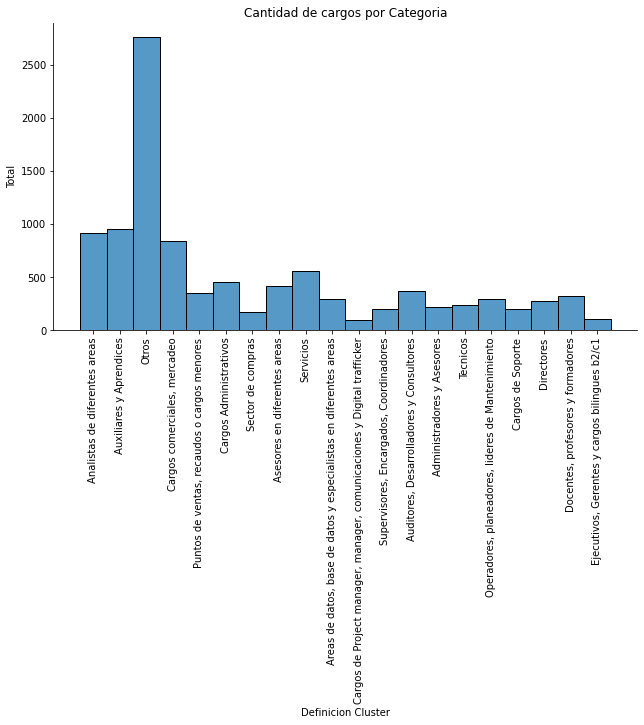

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df['Definicion Cluster'],discrete=True,aspect=2,height=5,kind="hist").set(title='Cantidad de cargos por Categoria')
plt.xticks(rotation=90)
plt.ylabel('Total')

#### Se podría mejorar la distribución de los cargos aumentando el número de clusters, el tipo de distancia utilizada, la semilla o las iteraciones. También se podría intentar hacer un reducción mayor de los terminos para una mejor limpieza de los datos

#### Con esto se finaliza el análisis de este ejercicio